<a href="https://colab.research.google.com/github/akame913/BayseWithColab/blob/main/%E5%BF%83%E7%90%86%E7%B5%B1%E8%A8%88%E6%B3%95_%E7%AC%AC1%E7%AB%A0%E3%80%9C%E7%AC%AC4%E7%AB%A0%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%97%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>心理統計法</h1>
  <h2>-第1章〜第4章スクリプト-</h2>
  <h3>第4章スクリプト実行なし</h3>

  
</div>


# 共通処理

In [78]:
%matplotlib inline
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [79]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np
from scipy import stats
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

In [80]:
import pymc as pm
import pytensor.tensor as pt
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArViz v{az.__version__}")

Running on PyMC v5.7.2
Running on ArViz v0.15.1


# 第1章 データ分布の要約


## 表1.1の「知覚時間」のデータ入力

```
#表1.1の「知覚時間」のデータ入力
x<-c(31.43,31.09,33.38,30.49,29.62,
     35.40,32.58,28.96,29.43,28.52,
     25.39,32.68,30.51,30.15,32.33,
     30.43,32.50,32.07,32.35,31.57)

```


In [81]:
x=np.array([31.43, 31.09, 33.38, 30.49, 29.62, 35.40, 32.58, 28.96, 29.43, 28.52, 25.39, 32.68, 30.51, 30.15, 32.33, 30.43, 32.50, 32.07, 32.35, 31.57])
tsd=x
dfx = pd.DataFrame({'x':x})

## 表1.2　度数分布表

```

#表1.2　度数分布表
(xs50<-seq(24.5,35.5,1))            #階級値
(xt<-table(cut(x,xs50,right =F)))   #度数
(xp<-xt/length(x))                  #確率
cumsum(xt)                          #累積度数
cumsum(xp)                          #累積確率

```


## 図1.1　ヒストグラム

```

#図1.1　ヒストグラム
par(mfrow=c(1,2))
xs50<-seq(24,36,1); hist(x,xs50,xlab="時間(秒)",col=4)
xs25<-seq(24,36,2); hist(x,xs25,xlab="時間(秒)",col=2)
par(mfrow=c(1,1))

```


<ipython-input-82-523899cf977d>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,2,1)
<ipython-input-82-523899cf977d>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,2,2)
<ipython-input-82-523899cf977d>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,2,3)
<ipython-input-82-523899cf977d>:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,2,4)


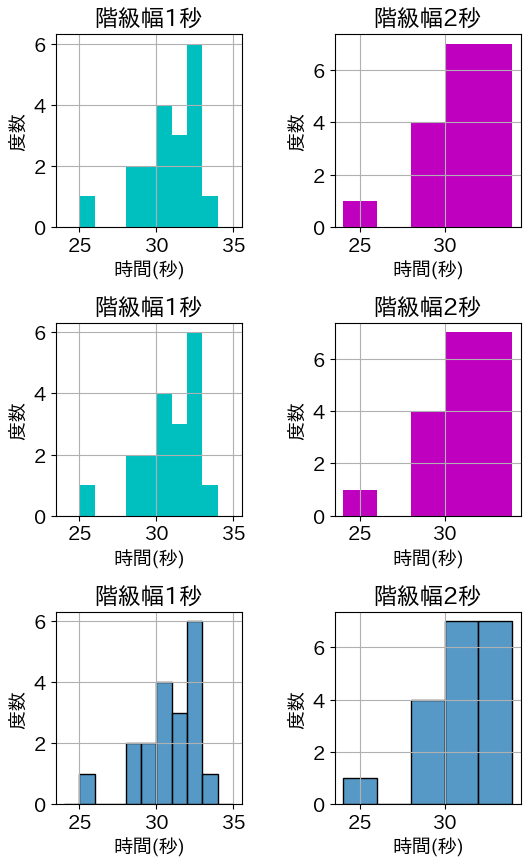

In [82]:
# ヒストグラム
bins1=np.arange(24.0, 36.0, 1)
bins2=np.arange(24.0, 36.0, 2)
#
fig, ax = plt.subplots(2, 2, figsize=(6.0, 10.0))
plt.subplots_adjust(wspace=0.5, hspace=0.5) # (2)間隔指定

# numpy
ax = plt.subplot(3,2,1)
plt.title('階級幅1秒')
plt.hist(x, color="c", bins=bins1)
plt.xlabel("時間(秒)")
plt.ylabel("度数")

ax = plt.subplot(3,2,2)
plt.title('階級幅2秒')
plt.hist(x, color="m", bins=bins2)
plt.xlabel("時間(秒)")
plt.ylabel("度数")

# pandas
ax = plt.subplot(3,2,3)
plt.title('階級幅1秒')
plt.xlabel("時間(秒)")
dfx['x'].hist(color="c", bins=bins1)
plt.ylabel("度数")

ax = plt.subplot(3,2,4)
plt.title('階級幅2秒')
dfx['x'].hist(color="m", bins=bins2)
plt.xlabel("時間(秒)")
plt.ylabel("度数")

# seaborn
ax = plt.subplot(3,2,5)
plt.title('階級幅1秒')
plt.xlabel("時間(秒)")
sns.histplot(data=dfx, x='x', bins=bins1)
plt.ylabel("度数")

ax = plt.subplot(3,2,6)
plt.title('階級幅2秒')
sns.histplot(data=dfx, x='x', bins=bins2)
plt.xlabel("時間(秒)")
plt.ylabel("度数")

plt.show()


## 「知覚時間」要約統計量(積率系)

```

#「知覚時間」要約統計量(積率系)
mean(x)                               #平均値
van<-function(x){mean((x-mean(x))^2)} #分散を計算する関数
round(s2<-van(x),3)                   #分散
round(s<-sqrt(s2),3)                  #標準偏差
```


In [83]:
# 平均値の計算
#print(f"平均値:  {np.mean(x)}")
print("平均値\t:\t{:.3f}".format(np.mean(x)))
# 分散の計算
#print('分散: ' + str(np.var(x)))
print("分散\t:\t{:.3f}".format(np.var(x)))

# 標準編差の計算
#print('標準偏差: ' + str(np.std(x)))
print("標準偏差:\t{:.3f}".format(np.std(x)))

# 中央値
#print('中央値: ' + str(np.median(x)))
print("中央値\t:\t{:.3f}".format(np.median(x)))



平均値	:	31.044
分散	:	4.275
標準偏差:	2.068
中央値	:	31.260


## 「知覚時間」要約統計量(分位系)

```

#「知覚時間」要約統計量(分位系)
sort(x)                               #小さい順に並べる
median(x)                             #中央値
quantile(x,0.3,type =1)               #30％点
quantile(x,0.7,type =1)               #70％点
rev(sort(table(round(x))))            #階級幅1秒の最頻値

```


In [84]:
print("中央値\t {:.3f}".format(np.median(x)))
print("30%点\t {:.3f}".format(np.quantile(x, 0.3)))
print("70%点\t {:.3f}".format(np.quantile(x, 0.7)))
m=stats.mode(np.round(x))
#print(m.mode)
print(f"最頻値\t {m.mode}")

#Pythonで配列の軸を入れ替える方法です。
#使用するのは、Pythonのnumpyライブラリのtranspose関数です。
print('\npandas describe()でtranspose関数によって配列の軸を入れ替える\n')
print(dfx.describe().transpose())


中央値	 31.260
30%点	 30.346
70%点	 32.336
最頻値	 32.0

pandas describe()でtranspose関数によって配列の軸を入れ替える

   count   mean   std    min    25%    50%    75%    max
x 20.000 31.044 2.121 25.390 30.017 31.260 32.388 35.400


## 1.2 経験分布と理論分析

### ネイピア数のべき乗
ネイピア数$e$は数学的に扱いやすい値なので、分布や確率を扱う際によく使われます。  
ネイピア数のべき乗$e^x$は、以下のように$\exp$を使ってよく表されます。  

$$\exp(x)$$

NumPyでは、`np.e`によりネイピア数を取得することができます。また、`np.exp( )`関数によりネイピア数のべき乗を計算することができます。

ネイピア数を使った以下の式により、釣鐘状の曲線を描くことができます。

$$y=\exp(-x^2)$$



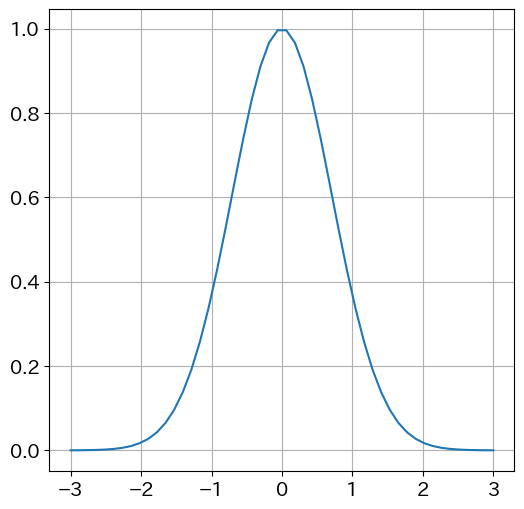

In [85]:
#ネイピア数のべき乗
x = np.linspace(-3, 3)
y = np.exp(-x**2)

plt.plot(x, y)
plt.show()

### 正規分布

「正規分布」（normal distribution）は、自然界の様々な現象に対してよく当てはまるデータの分布です。  
例えば、身長や体重、テストの成績、工業製品のサイズなどは正規分布におおよそ従います。  

正規分布において、ある値$x$が得られる確率$f(x)$は、以下の確率密度関数と呼ばれる関数で表されます。  

$$ f(x)=\frac{1}{ \sigma\sqrt{2\pi}}\exp(-\frac{(x-\mu)^2}{2\sigma ^2}) $$

ここで、$\mu$は平均値で分布の中央となり、$\sigma$は標準偏差で分布の広がり具合を表します。  

上記の式は少々複雑ですが、平均値を0、標準偏差を1とすると以下のように比較的シンプルな形になります。

$$ f(x)=\frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2}) $$

それでは、確率密度関数を使って正規分布の曲線を描画しましょう。平均値は0に固定し、標準偏差を3通りにして3つの曲線を描画します。  

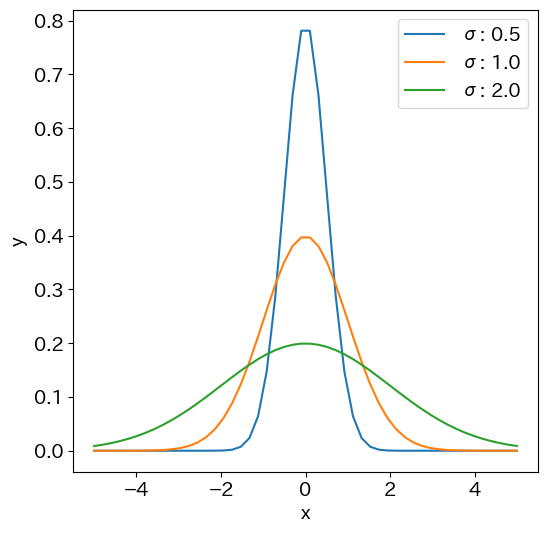

In [86]:
### 正規分布
def pdf(x, mu, sigma):  # mu: 平均値  sigma: 標準偏差
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))  # 確率密度関数

x = np.linspace(-5, 5)
y_1 = pdf(x, 0.0, 0.5)  # 平均値が0で標準偏差が0.5
y_2 = pdf(x, 0.0, 1.0)  # 平均値が0で標準偏差が1
y_3 = pdf(x, 0.0, 2.0)  # 平均値が0で標準偏差が2

plt.plot(x, y_1, label="σ: 0.5")
plt.plot(x, y_2, label="σ: 1.0")
plt.plot(x, y_3, label="σ: 2.0")
plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.grid()

plt.show()


### 知覚測定時間の確率密度関数グラフ

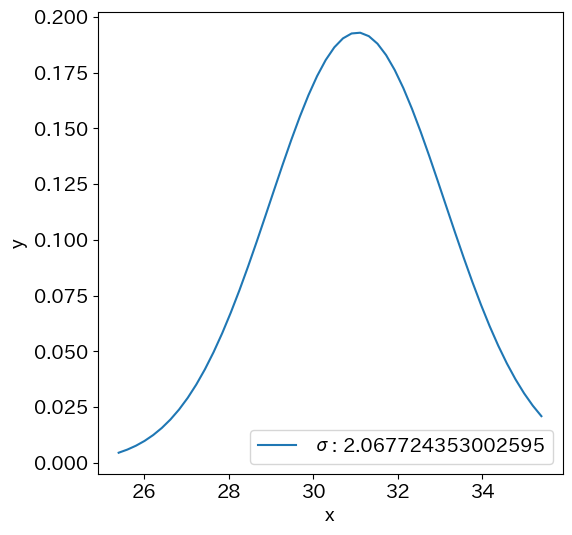

In [87]:
### 知覚測定時間の確率密度関数グラフ
x = np.linspace(np.amin(tsd), np.amax(tsd))
y_1 = pdf(x, np.average(tsd), np.std(tsd))

sigma_val = np.std(tsd)
sigma_txt = "σ: " + str(sigma_val)
plt.plot(x, y_1, label=sigma_txt)
plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.grid()

plt.show()

### 正規分布に従う乱数
正規分布に従う乱数は、NumPyの`random.normal( )`関数を使って生成することがます。  
以下のコードは、生成されたデータの分布をmatplotlibの`hist( )`関数でヒストグラムとして表示します。  

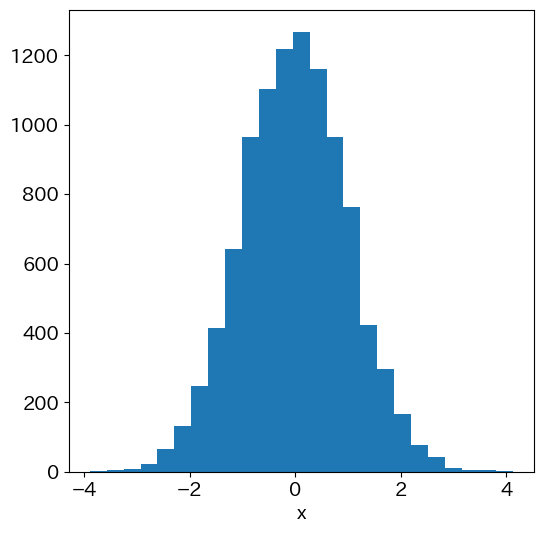

In [88]:
# 正規分布に従う乱数を生成
s = np.random.normal(0, 1, 10000)  # 平均0、標準偏差1、10000個

# ヒストグラム
plt.hist(s, bins=25)  # binsは棒の数

plt.xlabel("x", size=14)
plt.grid()

plt.show()

# 第2章 事後分布とベイズの定理

## 図2.2　恩赦される確率の事後分布


```
set.seed(1234)                     #乱数の種
nod<-1000000                       #乱数の数
BdAa<-runif(nod)                   #f(Bd|Aa)の確率分布
AaBd<-BdAa/(BdAa+1)                #事後分布
mean(AaBd)                         #EAP推定値
median(AaBd)                       #MED推定値
hist(AaBd,breaks=50,freq=F,col=3)  #事後分布、MAP推定値=0.5
```


平均値	:	0.307
中央値	:	0.333
最頻値	:	 0.49


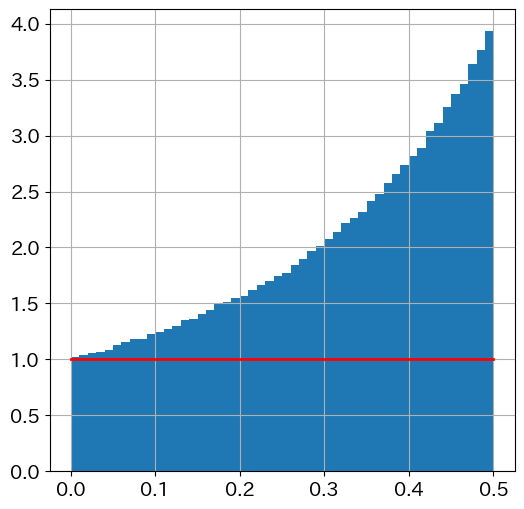

In [89]:
# set.seed(1234)                     #乱数の種
np.random.seed(1234)

#nod<-1000000                       #乱数の数
nod = 1000000

# BdAa<-runif(nod)                   #f(Bd|Aa)の確率分布
BdAa=np.random.uniform(0,1,nod)

# AaBd<-BdAa/(BdAa+1)                #事後分布
AaBd=BdAa/(BdAa+1)

# mean(AaBd)                         #EAP推定値
print("平均値\t:\t{:.3f}".format(np.mean(AaBd)))

# median(AaBd)                       #MED推定値
print("中央値\t:\t{:.3f}".format(np.median(AaBd)))

m=stats.mode(np.round(AaBd,decimals=2))
print(f"最頻値\t:\t {m.mode}")

#hist(AaBd,breaks=50,freq=F,col=3)  #事後分布、MAP推定値=0.5
count, bins, ignored = plt.hist(AaBd, 50, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()


# 第3章 1群の正規分布の分析

```
#第3章用スクリプト
getwd()                        #working directoryの確認
source('myfunc/myfunc.R')      #自作関数の読み込み
library(rstan)                 #パッケージrstanの呼び出し
rstan_options(auto_write=T)
options(mc.cores=parallel::detectCores())

#表1.1の「知覚時間」のデータ入力
x<-c(31.43,31.09,33.38,30.49,29.62,
     35.40,32.58,28.96,29.43,28.52,
     25.39,32.68,30.51,30.15,32.33,
     30.43,32.50,32.07,32.35,31.57)

out <-G1mean(x,prior=F, fi=NA)#正規分布に関する推測
#図3.1 トレースプロット
traceplot(out$fit, inc_warmup = F, pars=c("mu","sigma"))
out2<-print(out,2)            #表3.1, 表3.2

hist(out$mu,breaks=100)       #図3.3 平均の事後分布
hist(out$sigma,breaks=100)    #図3.4 sdの事後分布
hist(out$xaste,breaks=100)    #図3.5 事後予測分布
```




In [90]:
#表1.1の「知覚時間」のデータ入力
x=np.array([31.43,31.09,33.38,30.49,29.62,
            35.40,32.58,28.96,29.43,28.52,
            25.39,32.68,30.51,30.15,32.33,
            30.43,32.50,32.07,32.35,31.57])


## 3.1 事後分布の近似

```
out <-G1mean(x,prior=F, fi=NA)#正規分布に関する推測
```

### 確率モデル定義
平均値は上限100.0、下限-100.0の実数値を一様分布、標準偏差は上限100、下限0の正の値のみの一様分布とする。


In [91]:
# 確率モデル定義

model1 = pm.Model()

with model1:
  mu = pm.Uniform("mu", upper=100.0, lower=-100.0)
  sigma = pm.Uniform("sigma", upper= 10**2, lower= 0)
  X_obs = pm.Normal('X_obs', mu=mu, sigma=sigma, observed=x)
  # 計算値
  # 全平均 muAll
  #uAll = pm.Deterministic('muAll', pt.mean(mu))
  # 要因の効果の標準偏差 sigmaA
  #sigmaA = pm.Deterministic('sigmaA', pt.std(mu))
  # 分散説明率 eta2
  #eta2 = pm.Deterministic('eta2',
  #                          pt.sqr(sigmaA) / (pt.sqr(sigmaA) + pt.sqr(sigmaE)))


### 確率モデル構造可視化

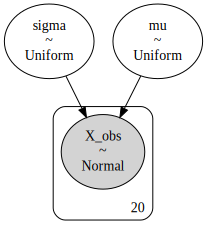

In [92]:
#確率モデル構造可視化

g = pm.model_to_graphviz(model1)
display(g)


### サンプリング

In [93]:
#5.1.4 サンプリング

with model1:
#    idata1 = pm.sample(random_seed=1234)          #約26秒
#    idata1 = pm.sample(chains=5, random_seed=1234)          #約1分
    idata1 = pm.sample(20000, chains=5, random_seed=1234)  #テキスト指定　約2分


### 図3.1 トレースプロット


```
#図3.1 トレースプロット
traceplot(out$fit, inc_warmup = F, pars=c("mu","sigma"))
out2<-print(out,2)            #表3.1, 表3.2
```

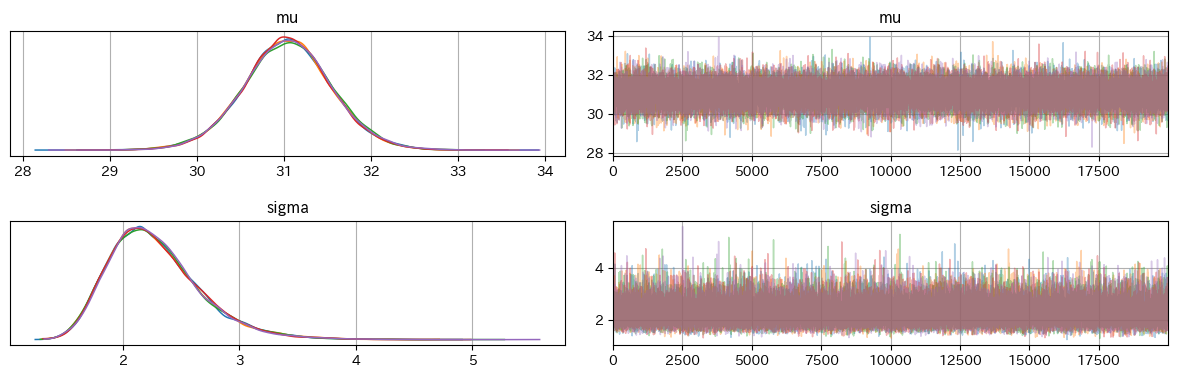

In [94]:
#5.1.5 結果分析
#plot_trace関数による分析

az.plot_trace(idata1, compact=False)
plt.tight_layout();

In [95]:
#idata直接確認

idata1

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

## 3.4「知覚時間」のベイズ的推測

### 表3-2 「知覚時間」の母数の推定結果

In [96]:
#sumamry関数による統計分析

summary1 = az.summary(idata1, hdi_prob=.95)
display(summary1)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,31.040,0.515,30.029,32.071,0.002,0.001,80685.000,65368.000,1.000
sigma,2.274,0.403,1.555,3.065,0.002,0.001,74374.000,64022.000,1.000


母平均の点推定値は31.04秒であり、その平均的な推定誤差である post.sd は0.52秒であった。post.sd の小ささから、μ は30秒より上にあると推測される。

### 図3-3, 3-4 平均・標準偏差の事後分布

array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

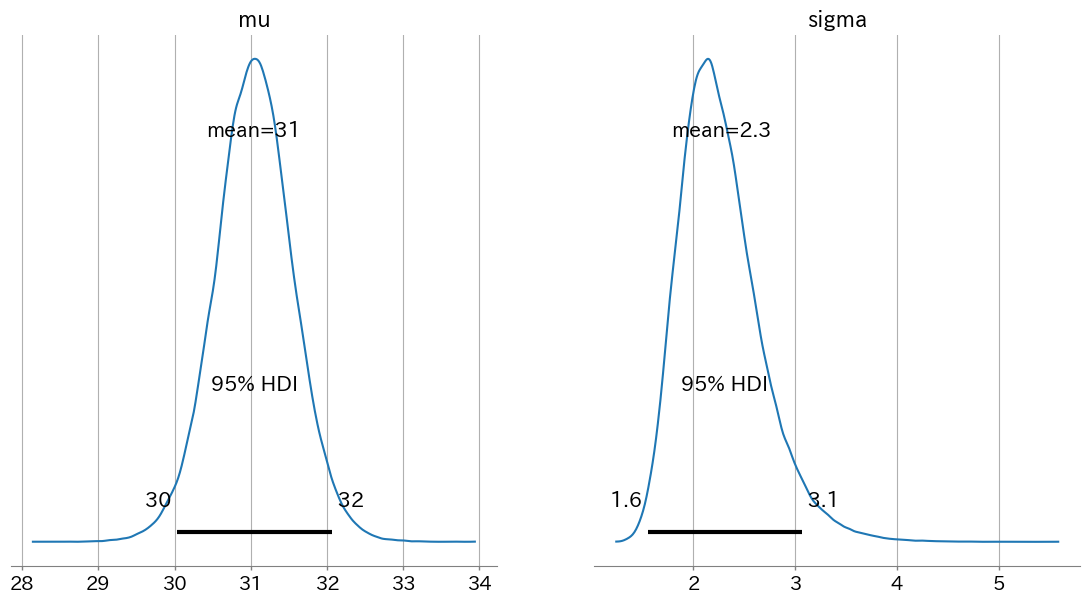

In [97]:
#plot_posterior関数による分析

az.plot_posterior(idata1, hdi_prob=.95)

In [98]:
#各確率変数の平均値取得

mu_mean1 = summary1.loc['mu','mean']
sigma_mean1 = summary1.loc['sigma','mean']

# 結果確認
print(f'mu={mu_mean1}, sigma={sigma_mean1}')


mu=31.04, sigma=2.274



```
hist(out$mu,breaks=100)       #図3.3 平均の事後分布
hist(out$sigma,breaks=100)    #図3.4 sdの事後分布
hist(out$xaste,breaks=100)    #図3.5 事後予測分布
```

### 3.4.3 事後予測分布

Posterior Predictive Check:

次にサンプルされたパラメータの事後分布に従ってデータを発生させ、実際のデータと比較するPosterior Predictive Checkを実施します。訓練データを適切に表現できているかを確認するチェックと理解しています。

In [99]:
with model1:
    ppc = pm.sample_posterior_predictive(idata1, return_inferencedata=False)
    idata_ppc = pm.to_inference_data(posterior_predictive=ppc)

In [100]:
ppc

{'X_obs': array([[[30.221, 35.147, 28.864, ..., 32.366, 29.327, 29.696],
         [35.400, 30.562, 31.801, ..., 30.426, 31.750, 31.132],
         [30.162, 32.499, 33.139, ..., 29.163, 25.976, 34.381],
         ...,
         [33.040, 32.511, 31.620, ..., 35.536, 30.738, 33.646],
         [28.333, 34.114, 31.929, ..., 27.465, 27.473, 33.556],
         [27.243, 29.904, 29.294, ..., 30.702, 24.550, 31.926]],
 
        [[29.128, 30.206, 26.474, ..., 32.385, 31.395, 29.575],
         [29.481, 32.574, 28.571, ..., 31.123, 32.013, 31.869],
         [30.980, 28.706, 33.253, ..., 33.896, 36.629, 30.321],
         ...,
         [33.575, 30.574, 30.913, ..., 31.519, 29.009, 32.036],
         [29.135, 26.412, 27.017, ..., 29.239, 30.719, 32.900],
         [29.631, 34.038, 31.347, ..., 33.255, 31.421, 31.445]],
 
        [[32.370, 32.229, 34.030, ..., 30.980, 30.845, 29.520],
         [32.320, 34.723, 29.788, ..., 32.434, 35.120, 29.916],
         [28.175, 35.883, 29.197, ..., 30.047, 32.071, 29.788

In [101]:
idata_ppc

Inference data with groups:
	> posterior_predictive
	> observed_data

In [102]:
ppc_samples = ppc['X_obs']
ppc_samples.shape


(5, 20000, 20)

In [103]:
ppc_samples = ppc_samples.reshape(2,-1)
ppc_samples.shape

(2, 1000000)

### 表3-2「知覚時間」の母数の推定結果（2）

In [104]:
summary2 = az.summary(ppc_samples, hdi_prob=.95)
print(display(summary1))
print(display(summary2))

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,31.040,0.515,30.029,32.071,0.002,0.001,80685.000,65368.000,1.000
sigma,2.274,0.403,1.555,3.065,0.002,0.001,74374.000,64022.000,1.000


None


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,31.043,2.367,26.360,35.740,0.002,0.002,960691.000,1071066.000,1.000


None


In [105]:
np.percentile(ppc_samples,25)

29.50609188632804

### 図3-5 事後予測分布

<Axes: title={'center': 'x'}>

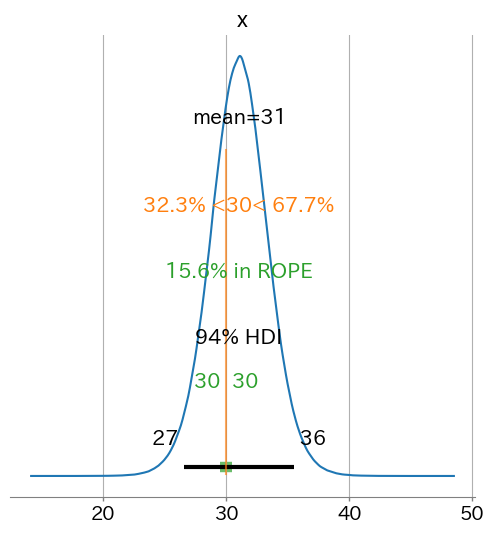

In [106]:

az.plot_posterior(ppc_samples, rope=(29.5, 30.5), ref_val=30.0)

In [107]:
ppc_mean = ppc_samples.mean(axis=0)
ppc_var = ppc_samples.var(axis=0)

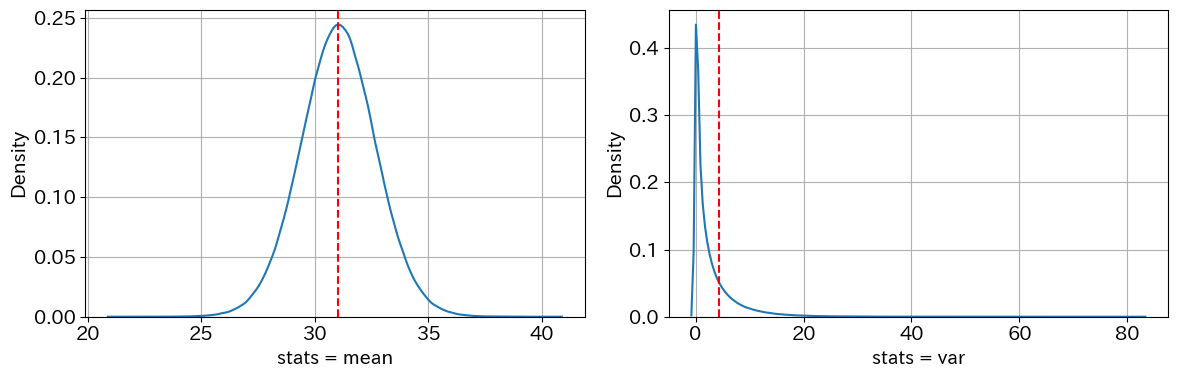

In [108]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.kdeplot(ppc_mean, ax=ax[0])
ax[0].axvline(x.mean(), color='r', linestyle='dashed')
ax[0].set_xlabel('stats = mean')

sns.kdeplot(ppc_var, ax=ax[1])
ax[1].axvline(x.var(), color='r', linestyle='dashed')
ax[1].set_xlabel('stats = var')

plt.tight_layout()


<Axes: xlabel='X_obs / X_obs'>

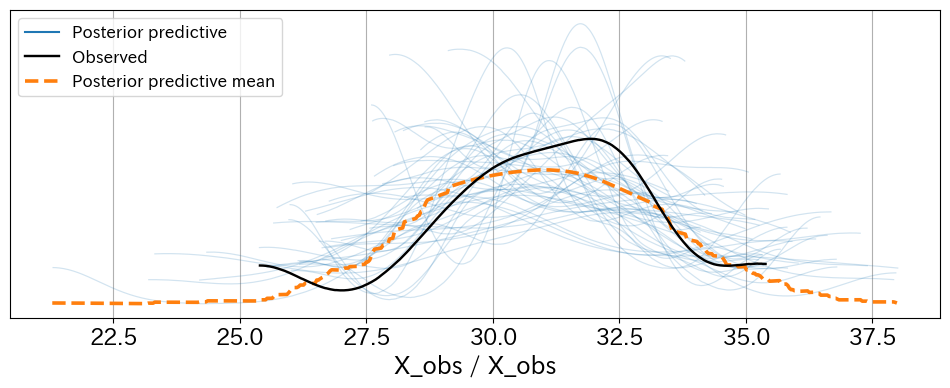

In [109]:
# 分布によるチェック

az.plot_ppc(idata_ppc, kind='kde', num_pp_samples=50, figsize=(12, 4))

<Axes: xlabel='X_obs / X_obs'>

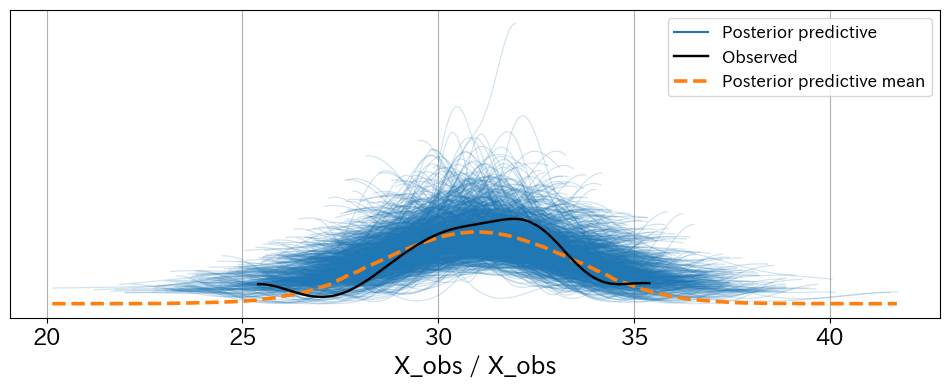

In [110]:
az.plot_ppc(idata_ppc, kind='kde', num_pp_samples=1000, figsize=(12, 4))

In [111]:
#5.1.6 正規分布関数とヒストグラムの重ね描き
#正規分布関数

def norm(x, mu, sigma):
    y = (x-mu)/sigma
    a = np.exp(-(y**2)/2)
    b = np.sqrt(2*np.pi)*sigma
    return a/b


In [112]:
#ベイズ推論結果に基づく関数値計算

x_min = x.min()
x_max = x.max()
x_list = np.arange(x_min, x_max, 0.01)
y_list = norm(x_list, mu_mean1, sigma_mean1)


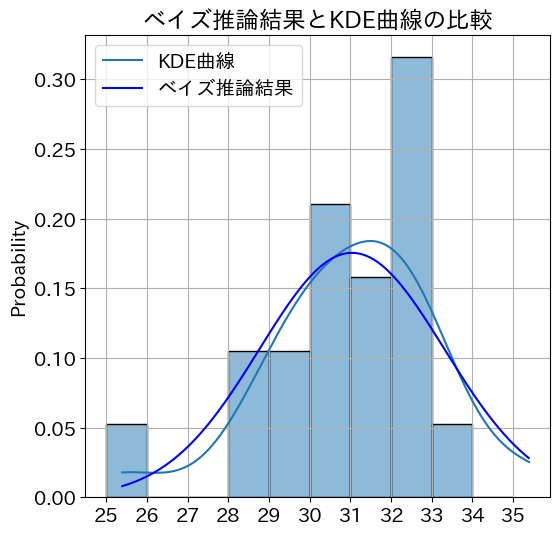

In [113]:
#ベイズ推論結果に基づく正規分布関数とKDE曲線の重ね描き

delta = 1
bins=np.arange(25.0, 36.0, delta)
fig, ax = plt.subplots()
sns.histplot(x, ax=ax, bins=bins, kde=True, stat='probability')
ax.get_lines()[0].set_label('KDE曲線')
ax.set_xticks(bins)
ax.plot(x_list, y_list*delta, c='b', label='ベイズ推論結果')
ax.set_title('ベイズ推論結果とKDE曲線の比較')
plt.legend();

# 第4章 生成量と研究仮説が正しい確率
```
getwd()                        #working directoryの確認
source('myfunc/myfunc.R')      #自作関数の読み込み
library(rstan)                 #パッケージrstanの呼び出し
rstan_options(auto_write=T)
options(mc.cores=parallel::detectCores())

#表1.1の「知覚時間」のデータ入力
x<-c(31.43,31.09,33.38,30.49,29.62,
     35.40,32.58,28.96,29.43,28.52,
     25.39,32.68,30.51,30.15,32.33,
     30.43,32.50,32.07,32.35,31.57)

out <-G1mean(x,prior=F, fi=NA) #平均値等に関する推測
out2<-print(out,degits=2,cr1=30,cr2a=30.5,cr2b=29.5,
             cr3=30,cr4=30,cr5=0.5,pr1=0.25,pr2=0.2)

#各種事後分布
hist(out2$G[,1],breaks=100)       #図4.1
hist(out2$G[,2],breaks=100)       #図4.2
hist(out2$G[,3],breaks=100)       #図4.3
hist(out2$G[,4],breaks=100)       #図4.4
hist(out2$G[,5],breaks=100)       #図4.5
hist(out2$G[,6],breaks=100)       #図4.6
```

## 4.1.生成量1

### 分散
分散：測定値から平均を引いて2乗した値の平均（variance）
$$s^{2}=\frac{1}{n}((x_{1}-\bar{x})^{2}+⋯+((x_{i}-\bar{x})^{2}+⋯+((x_{n}-\bar{x})^{2})$$

標準偏差：平均的な散布度として解釈するために、分散の平方根をとり、元の測定単位に戻す（standard deviation）$$s=\sqrt[2]{s^{2}}$$

### 図4-1 分散の事後分布

       mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
sigma 5.335 1.998     2.252      9.215      0.008    0.006 74374.435   

       ess_tail  r_hat  
sigma 64022.005  1.000  


<Axes: >

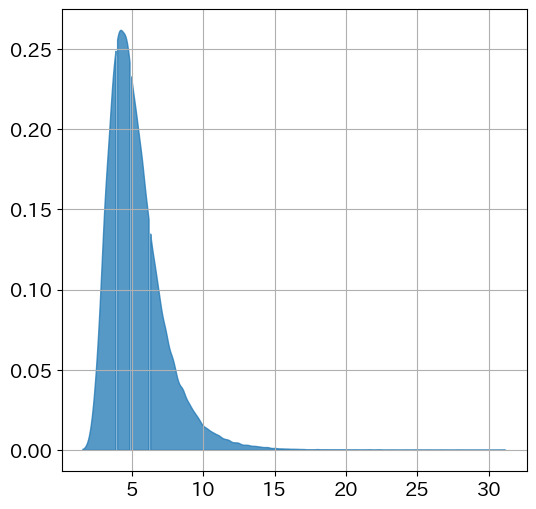

In [114]:
x=idata1.posterior.sigma
xx = (x)**2
print(az.summary(xx, hdi_prob=0.95, round_to=3))
az.plot_dist(xx, quantiles=[.25, .5, .75])

### 変動係数
測定値が比例尺度である場合には、散布度のしようとして変動係数（coefficient of variarion）
$$cv=\frac{σ}{μ}$$

   mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
x 0.073 0.013     0.050      0.099      0.000    0.000 74374.435 64022.005   

   r_hat  
x  1.000  


<Axes: >

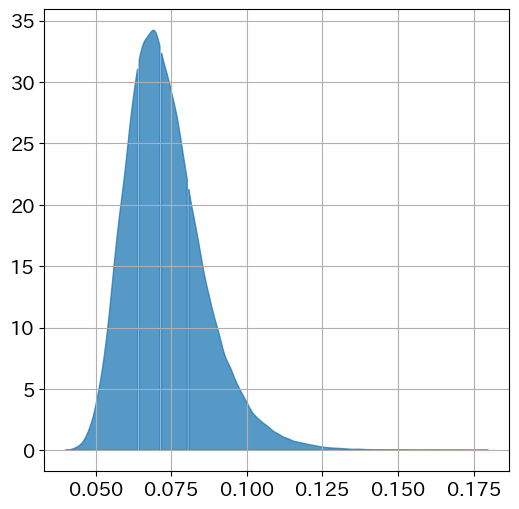

In [115]:
cv=(idata1.posterior.sigma)/(idata1.posterior.mu.mean())
print(az.summary(cv, hdi_prob=0.95, round_to=3))
az.plot_dist(cv, quantiles=[.25, .5, .75])

結果は0.07(0.01)[0.05, 0.10]であった。$\hat{cv}_{eap}=0.07$であり、測定時間は平均値の7%くらいの散らばりがある。

## 4.2.生成量2

### 効果量
標準偏差を単位として、平均が基準点からどれくらい離れているかの指標に効果量（effect size）がある
$$δ_{c}=\frac{\mu-c}{\sigma}$$

   mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
x 0.471 0.237     0.011      0.939      0.001    0.001 83700.339 64637.498   

   r_hat  
x  1.000  


<Axes: >

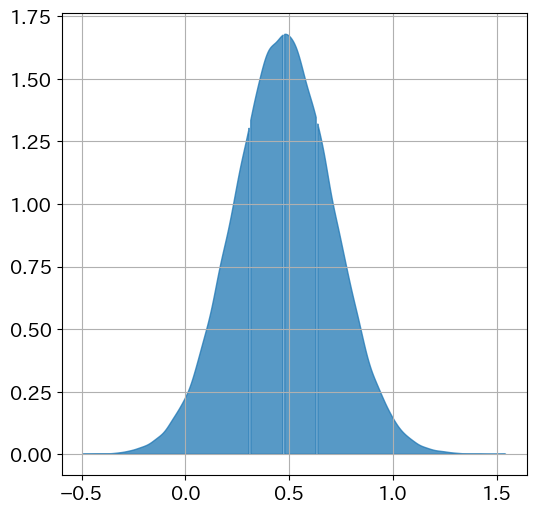

In [116]:
d30=(idata1.posterior.mu - 30.0)/idata1.posterior.sigma
print(az.summary(d30, hdi_prob=0.95, round_to=3))
az.plot_dist(d30, quantiles=[.25, .5, .75])

効果量は0.47(0.24)[0.01, 0.94]と推測された。$\delta_{30eap}=0.47$だから、目標となる実時間30秒に対して、平均値は、平均的な散らばりの47%くらい上の点であると解釈する。95%の確信で効果量は[0.01, 0.94]に存在する。

### 分位点・％点
%点の事後分布は$$g(\mu^{(t)},\sigma^{(t)})=\mu^{(t)}+z　ｘ　\sigma^{(t)}　　　　　　　　　　(4.9)$$

例えば「何秒より短い測定値が、4回に1回は観測されるだろうか」という疑問に答えるには、25%点を調べればよいのであるから、F(-0.675|μ = 0,σ = 1)≃0.25 より z = -0.675 とすれば、25%点の事後分布が得られる。

    mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
x 29.505 0.584    28.320     30.585      0.002    0.001 82228.480 60196.489   

   r_hat  
x  1.000  


<Axes: >

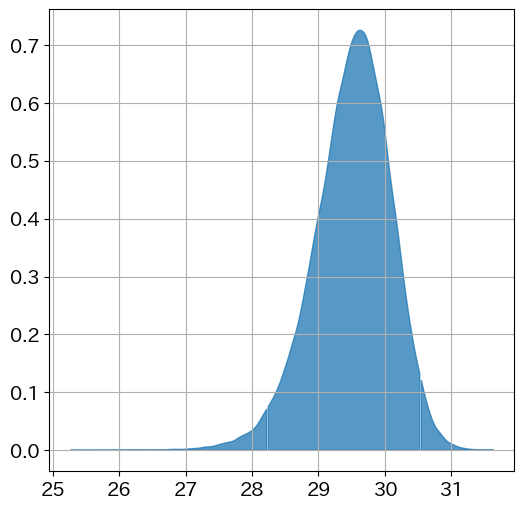

In [117]:
x_p25=idata1.posterior.mu + idata1.posterior.sigma*-0.675
print(az.summary(x_p25, hdi_prob=0.95, round_to=3))
az.plot_dist(x_p25, quantiles=[.025, .975])

観測の結果は 29.50(0.58)[28.32, 30.56]であった。EAP推定値を参照すると、4回に1回は 29.50 秒より短くなることがわかる、25%点の95%の確信区間の上限は 30.56 秒、下限は 28.32 秒である。確率の確率（メタ確率）として確信区間が定義される。

## 特定区間での観測確率
将来のデータが区間 [b, a] に観察される予測確率 $$F(x^{*}=a|x)-F(x^{*}=b|x)$$
の事後分布は、モデル生成分布の確率分布関数を利用して、生成量
$$g(\mu^{(t)},\sigma^{(t)})=F(a|\mu^{(t)},\sigma^{(t)})-F(b|\mu^{(t)},\sigma^{(t)})　　　　（4.11）$$
%点を調べると「ある確率で起きることはどんなことだろうか」という疑問に答えることができる。つまり（4.9）式を使うということは、確率を固定して現象を調べるということである。（4.11）式を使うと、逆に「ある現象はどの程度の確率で起きるだろうか」という疑問に答えることができる。
たとえば「人間は機械ではないから、ピタリ言い当てるのには限界がある。1秒の幅を設けて的中とするならば、測定値が 29.5 秒以上、30.5秒未満である確率はどれほどであろうか」といことが知りたければ、
$$g(\mu^{(t)},\sigma^{(t)})=F(30.5|\mu^{(t)},\sigma^{(t)})-F(29.5|\mu^{(t)},\sigma^{(t)})　　　　（4.11）$$


In [118]:
def calc_estimator(dat):
    return (np.mean(dat),
            np.std(dat),
            np.quantile(dat, 0.025),
            np.quantile(dat, 0.05),
            np.quantile(dat, 0.5),
            np.quantile(dat, 0.95),
            np.quantile(dat, 0.975))

mu=idata1.posterior.mu.data.reshape(-1)
sigma_E = idata1.posterior.sigma.data.flatten()
xobs = idata1.observed_data['X_obs']
xobs_sd = idata1.observed_data['X_obs'].std()
ppc_mu = ppc_samples
ppc_sd = ppc_samples.std()

u305 = stats.norm.sf(ppc_mu, loc=30.5, scale=ppc_sd)
u300 = stats.norm.sf(mu, loc=30.0, scale=sigma_E)
u295 = stats.norm.sf(ppc_mu, loc=29.5, scale=ppc_sd)
u_ab = u305 - u295
x_p30c = ppc_mu/30

df_A = pd.DataFrame({
                    'μ': calc_estimator(mu),
                    'σ': calc_estimator(sigma_E),
                    'x*': calc_estimator(ppc_samples.data),
                    'xobs': calc_estimator(xobs.data),
#                    'xobs_sd': calc_estimator(xobs_sd.data),
                    'var': calc_estimator(xx.data),
                    'cv': calc_estimator(cv.data),
                    'δ30': calc_estimator(d30.data),
                    'p25': calc_estimator(x_p25.data),
                    'u305': calc_estimator(u305),
                    'u300': calc_estimator(u300),
                    'u295': calc_estimator(u295),
                    'u_ab': calc_estimator(u_ab),
                    'x_p30c': calc_estimator(x_p30c)
                    }, index=['EAP', 'post.sd', '2.5%', '5%', '50%', '95%', '97.5%']).T
print(df_A)


          EAP  post.sd   2.5%     5%    50%    95%  97.5%
μ      31.040    0.515 30.017 30.198 31.040 31.886 32.061
σ       2.274    0.403  1.646  1.720  2.220  3.012  3.217
x*     31.043    2.367 26.345 27.169 31.046 34.911 35.727
xobs   31.044    2.068 26.877 28.363 31.260 33.481 34.441
var     5.335    1.998  2.710  2.960  4.927  9.074 10.347
cv      0.073    0.013  0.053  0.055  0.072  0.097  0.104
δ30     0.471    0.237  0.007  0.083  0.471  0.860  0.935
p25    29.505    0.584 28.238 28.485 29.549 30.381 30.531
u305    0.435    0.282  0.014  0.031  0.409  0.920  0.960
u300    0.323    0.083  0.175  0.195  0.319  0.467  0.497
u295    0.321    0.262  0.004  0.011  0.257  0.838  0.909
u_ab    0.114    0.049  0.008  0.017  0.129  0.167  0.167
x_p30c  1.035    0.079  0.878  0.906  1.035  1.164  1.191


## 結果報告
点推定にはEAPを用い、（　）内で事後標準偏差を、[ ]で確信区間（HDI）を表す。

$母平均\muは31.04(0.52)[30.02, 32.06]であり、実時間30秒より母平均が大きい確率はp(30 < μ)=0.95である。\sigmaは2.30(0.40)[1.65, 3.01]である。予測分布x^*は31.04(2.37)[26.35, 35.73]であり、幅1秒を的中とするとp(29.5 < x^* < 30.5)=0.11である。的中が5回に1回より少ない確率はp(p(29.5 < x^* < 30.5) < 0.2 ) = 0.95である。効果量\delta_{30}は0.47(0.24)[0.01, 0.94]であり、それが0.5以上である確率はp(0.5\leqδ_{30})=0.45である。$

# 参考stanによる実行

In [119]:
#!pip install nest_asyncio
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00


In [120]:
import nest_asyncio
nest_asyncio.apply()
import stan

In [121]:
G1meanPT = """
data {
int<lower=0> n;
array[n] real x;
real mL; real mH; real sL; real sH;
}
parameters {
real<lower=mL,upper=mH> mu;
real<lower=sL,upper=sH> sigma;
}
transformed parameters {
}
model {
x ~ normal(mu,sigma);
}
generated quantities{
real xaste;
real log_lik;
xaste= normal_rng(mu,sigma);
log_lik=normal_lpdf(x|mu,sigma);
}
"""

In [122]:
x = [31.43,31.09,33.38,30.49,29.62,
     35.40,32.58,28.96,29.43,28.52,
     25.39,32.68,30.51,30.15,32.33,
     30.43,32.50,32.07,32.35,31.57]

dat = {"n":len(x),
       "x":x,
       "mL":-1000,
       "mH":1000,
       "sL":0,
       "sH":100}

In [123]:
#out = stan.build(G1meanPT, data=dat)
out = stan.build(G1meanPT, data=dat)
fit = out.sample(num_chains=4, num_samples=1000)

Building...



Building: 54.1s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis propo

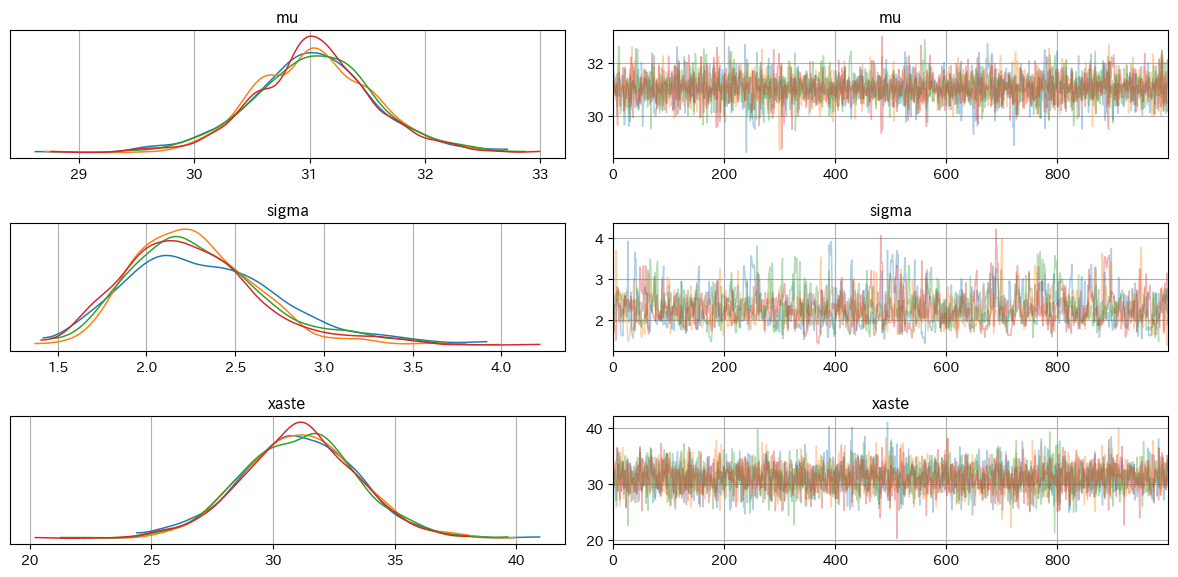

In [124]:
az.plot_trace(fit, compact=False)
plt.tight_layout();

In [125]:
fit

<stan.Fit>
Parameters:
    mu: ()
    sigma: ()
    xaste: ()
    log_lik: ()
Draws: 4000

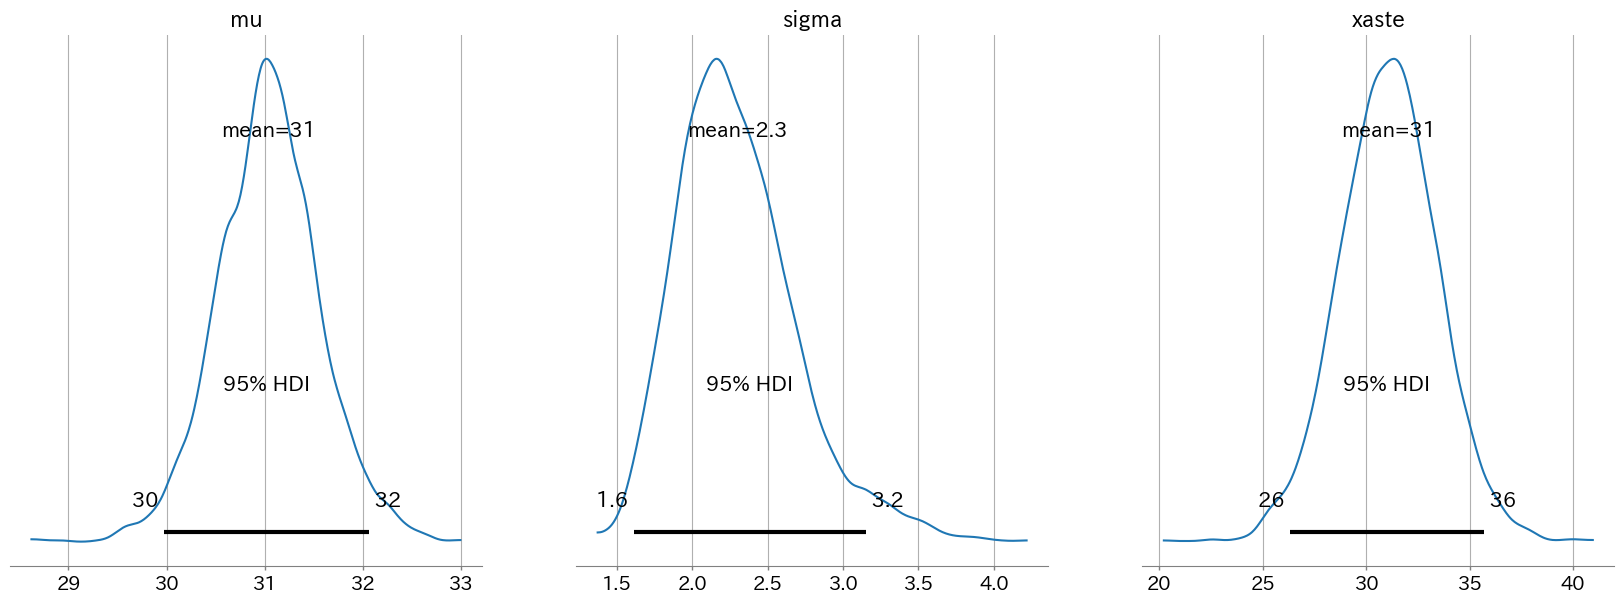

In [126]:
#plot_posterior関数による分析

az.plot_posterior(fit, hdi_prob=.95);

In [127]:
#sumamry関数による統計分析

summary1 = az.summary(fit)
display(summary1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,31.037,0.523,30.062,32.059,0.009,0.006,3502.000,2220.000,1.000
sigma,2.296,0.399,1.561,3.017,0.013,0.009,1045.000,889.000,1.010
xaste,31.078,2.374,26.716,35.625,0.038,0.027,3921.000,3924.000,1.000


In [128]:
print(fit)

<stan.Fit>
Parameters:
    mu: ()
    sigma: ()
    xaste: ()
    log_lik: ()
Draws: 4000
